<a href="https://colab.research.google.com/github/ehsankarami1358/ImagingSVHN/blob/main/SVHN_Cls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b3e2e367ef1add875bbc298a5189f9274fb07db6edf89fe420294e23c53e4751
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [3]:
import wget
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'
test_url = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'

In [5]:
train_url=wget.download(train_url)
test_url=wget.download(test_url)

In [6]:
from scipy.io import loadmat
data_train = loadmat('train_32x32.mat')
data_test = loadmat('test_32x32.mat')

In [7]:
type(data_train)

dict

In [8]:
data_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [36]:
X_train = data_train['X']
y_train = data_train['y']
X_test = data_test['X']
y_test = data_test['y']
y_train=np.where(y_train == 10, 0, y_train)
y_test=np.where(y_test == 10, 0, y_test)
np.unique(y_train)
X_train=np.transpose(X_train,(3,0,1,2))
X_test=np.transpose(X_test,(3,0,1,2))

X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0


In [37]:
X_train.shape

(73257, 32, 32, 3)

In [38]:
#onehot encoding labels
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,InputLayer
from keras.optimizers import Adam

Labels of 16837 th image is:[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


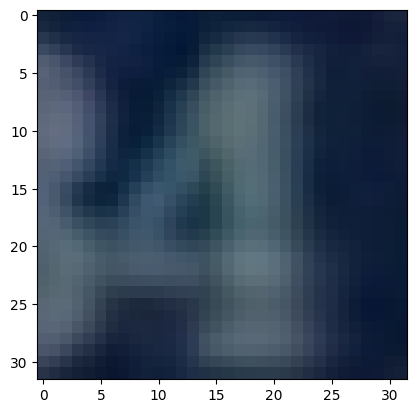

In [40]:
i=np.random.randint(1,len(X_train))
print(f'Labels of {i} th image is:{y_train[i]}')
plt.imshow(X_train[i])

In [41]:
model=Sequential()
model.add(InputLayer(input_shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(len(y_train[0]),activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │         154,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,138 (969.29 KB)

 Trainable params: 248,138 (969.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.1)

Epoch 1/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5643 - loss: 1.2919 - val_accuracy: 0.8653 - val_loss: 0.4571
Epoch 2/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8800 - loss: 0.4199 - val_accuracy: 0.8837 - val_loss: 0.3989
Epoch 3/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9017 - loss: 0.3420 - val_accuracy: 0.8952 - val_loss: 0.3654
Epoch 4/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9183 - loss: 0.2813 - val_accuracy: 0.8873 - val_loss: 0.3869
Epoch 5/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9298 - loss: 0.2360 - val_accuracy: 0.8959 - val_loss: 0.3694
Epoch 6/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9431 - loss: 0.1959 - val_accuracy: 0.8968 - val_loss: 0.3840
Epoch 7/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9490 - loss: 0.1715 - val_accuracy: 0.8866 - val_loss: 0.4365
Epoch 8/20
2061/2061 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9581 - loss: 0.141